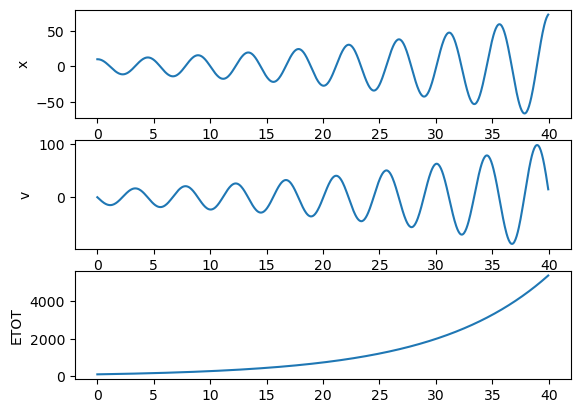

In [23]:
from matplotlib.pylab import *
from numpy import array,zeros,arange

k=2
m=1

def oscilator(state):
    v0=state[1]
    a=-k/m*state[0]
    return array([v0,a])



def Euler(y, derivative):
    y_next=y+derivative(y)*dt
    return y_next

xo=10 # initial conditions
vo=0
dt=0.05
to=0
te=40
t=arange(to,te,dt)
N=len(t)
y=zeros([N,2])
y[0,0]=xo
y[0,1]=vo

for i in range(N-1):
    y[i+1]=Euler(y[i],oscilator)


position=[y[j,0] for j in range(N)]
velocity=[y[j,1] for j in range(N)]
ETOT=[k*position[i]**2/2.+m*velocity[i]**2/2 for i in range(N)]

subplot(3,1,1)
plot(t,position)
ylabel("x")
xlabel("time")
subplot(3,1,2)
plot(t,velocity)
ylabel("v")
xlabel("time")
subplot(3,1,3)
plot(t,ETOT)
ylabel("ETOT")
show()

# poprawiony Euler

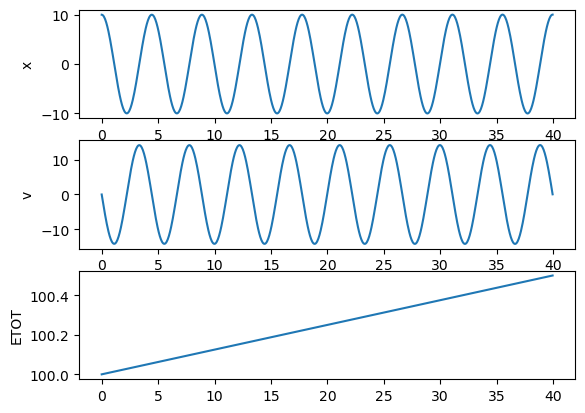

In [24]:
from matplotlib.pylab import *
from numpy import array,zeros,arange

# warunki początkowe

k=2
m=1


# wektor stanu

def oscilator(state):
    v0=state[1]
    a=-k/m*state[0]
    return array([v0,a])


# metoda

def EulerAv(y, derivative):
    y_next=y+(derivative(y)+derivative(y+derivative(y)*dt))*(dt/2)
    return y_next

"""
def Euler(y, derivative):
    y_next=y+derivative(y)*dt
    return y_next
"""


xo=10 # initial conditions
vo=0
dt=0.05
to=0
te=40
t=arange(to,te,dt)
N=len(t)
y=zeros([N,2])
y[0,0]=xo
y[0,1]=vo

for i in range(N-1):
    y[i+1]=EulerAv(y[i],oscilator)


position=[y[j,0] for j in range(N)]
velocity=[y[j,1] for j in range(N)]
ETOT=[k*position[i]**2/2.+m*velocity[i]**2/2 for i in range(N)]

subplot(3,1,1)
plot(t,position)
ylabel("x")
xlabel("time")
subplot(3,1,2)
plot(t,velocity)
ylabel("v")
xlabel("time")
subplot(3,1,3)
plot(t,ETOT)
ylabel("ETOT")
show()

# Model populacyjny

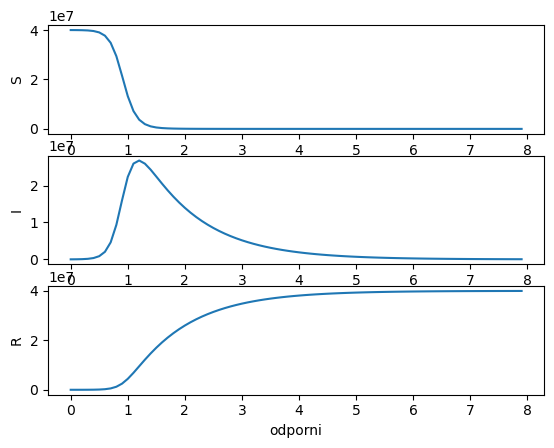

In [64]:
from pylab import *
from numpy import array,zeros,arange

beta=10
sigma=1
Npop=4*10**7
Io=10**4  # initial conditions
So=Npop-Io 
Ro=0
dt=0.1
to=0
te=8
t=arange(to,te,dt)
N=len(t)
y=zeros([N,3])
y[0,0]=So
y[0,1]=Io
y[0,2]=Ro


def SIR(state,t):
    s = state[0]
    i = state[1]
    r = state[2]
    ds = (-beta*s*i)/Npop
    di = (beta*s*i)/Npop - sigma * i
    dr = sigma * i
    return array([ds, di, dr])


def Runge_Kutta(y,t,dt,derivative):
    k1=dt*derivative(y,t)
    k2=dt*derivative(y+k1/2.,t+0.5*dt)
    k3=dt*derivative(y+k2/2.,t+0.5*dt)
    k4=dt*derivative(y+k3,t+dt)
    y_next=y+1/6.*(k1+2*k2+2*k3+k4)
    return y_next


for i in range(N-1):
    y[i+1]=Runge_Kutta(y[i],t[i],dt,SIR)


podatni=[y[j,0] for j in range(N)]
chorzy=[y[j,1] for j in range(N)]
odporni=[y[j,2] for j in range(N)]
subplot(3,1,1)
plot(t,podatni)
ylabel("S")
xlabel("podatni")
subplot(3,1,2)
plot(t,chorzy)
ylabel("I")
xlabel("chorzy")
subplot(3, 1, 3)
plot(t, odporni)
ylabel('R')
xlabel('odporni')
show()


# meshgrid, spoko opcja. Zobacz sobie

# Co to znaczy beta?
##### beta to wskaźnik zaraźliwości.
## Co się dzieje gdy zmieniam betę?
##### Im większa beta, tym szybciej podatni zmieniają się na chorych (wirus jest bardziej zaraźliwy)
###### W parze z tym idzie szybsze nabycie odporności / śmierć (spadek odczynnika chorych)